# Sequence 8 : Scipy

<img src="./img/sequence8_logo_scipy.png">

## Outils de calculs scientifiques pour Python

Collection d'algorithmes mathématiques et autres fonctions utiles basés sur Numpy.<br/>
Organisé en sous-catégories couvrant différents dommaines scientifiques (signal, stats, cluster, ...)

doc : http://www.scipy.org/

| Subpackage | Description   |
|------|------|
|cluster|Clustering algorithms|
|constants|Physical and mathematical constants|
|<b>fftpack</b>|Fast Fourier Transform routines|
|integrate|Integration and ordinary differential equation solvers|
|<b>interpolate</b>|Interpolation and smoothing splines|
|io|Input and Output|
|linalg|Linear algebra|
|ndimage|N-dimensional image processing|
|odr|Orthogonal distance regression|
|optimize|Optimization and root-finding routines|
|<b>signal</b>|Signal processing|
|sparse|Sparse matrices and associated routines|
|spatial|Spatial data structures and algorithms|
|special|Special functions|
|stats|Statistical distributions and functions|
|weave|C/C++ integration|

In [1]:
import numpy as np
import scipy
from scipy import interpolate
from scipy import fftpack
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline

## Exemple 1 : Interpolation

### Exercice 8.1 :

- Voici des données à interpoler.
En utilisant l'aide de scipy, trouver la fonction qui vous permetra de les interpoler de manière linéaire et cubique.
Tracez le résultat des interpolations sur une figure.

coup de pouce : utilisez [scipy.interpolate.interp1d](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.interp1d.html)

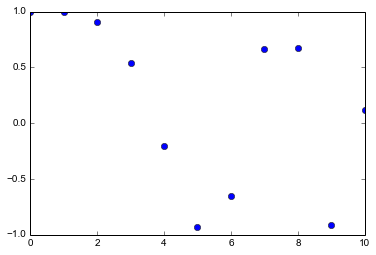

In [2]:
#Données :
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)

plt.plot(x,y, 'o')

### Solution 8.1 :

## Exemple 2 : FFT + Filtrage

### Etape 1 : Création d'une sinusoide

- On crée une sinusoide composée de 3 fréquences (1Hz, 30Hz, 50Hz), échantillonnée à 200 Hz, sur 5 secondes.

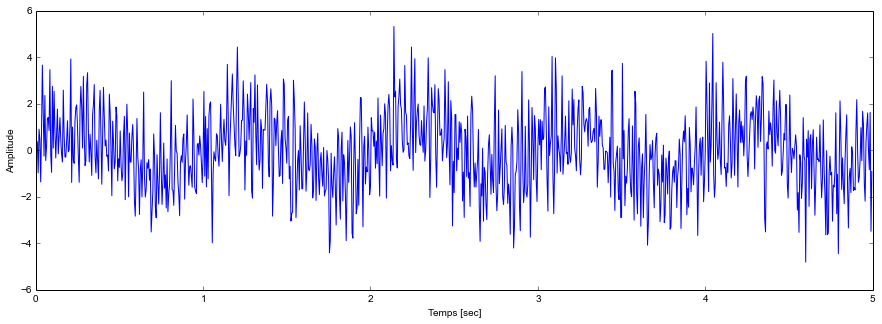

In [4]:
# Création du signal
fe = 200.
times = np.arange(0,5,1./fe, dtype = 'float64')  # Vecteur temps
l = times.size
f1 = 1
f2 = 30
f3 = 50
sig1 = np.sin(2*np.pi*f1*times)
sig2 = np.sin(2*np.pi*f2*times)
sig3 = np.sin(2*np.pi*f3*times)
sig = sig1 + sig2 + sig3 + np.random.randn(l)

# Figure
fig, ax = plt.subplots(figsize=(15,5)) 
ax.plot(times, sig)
ax.set_xlabel('Temps [sec]')
ax.set_ylabel('Amplitude')

### Etape 2 : Calcul et tracé du spectre

<img src="./img/sequence08_spectre.jpg" width=100, height=20>

- Pour voir le contenu fréquentiel de notre signal, nous allons calculer le "spectre" du signal et le tracer. <br/> 
La FFT (Fast Fourier Transform) est une trasformation mathématique qui donne une vision de ce spectre de manière "assez simple"

[-29.38490748 +0.j          -9.25496835-38.25889615j
  50.77183527+28.12750914j]


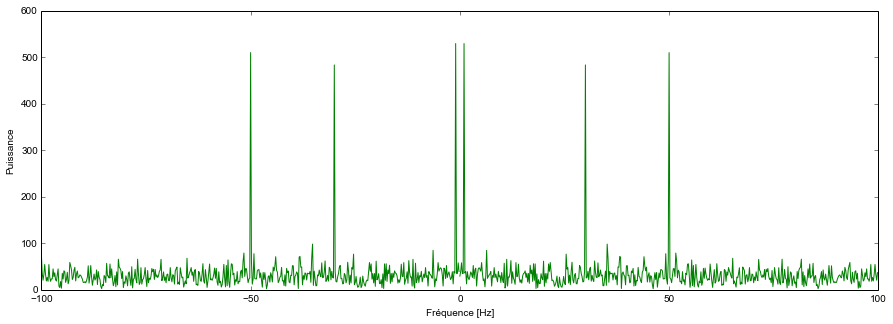

In [5]:
# Calcul de la transformée de Fourier du signal
sig_fft = scipy.fftpack.fft(sig)

# Création du vecteur de fréquences associé aux valeurs spectrales
sample_freq = scipy.fftpack.fftfreq(sig.size, d=1./fe)

print(sig_fft[0:3])

# Tracé du spectre
fig2, ax2 = plt.subplots(figsize=(15,5)) 
#ax2.plot(sample_freq, np.abs(sig_fft))
ax2.plot(sample_freq[0:500], np.abs(sig_fft)[0:500], 'g')
ax2.plot(sample_freq[500:], np.abs(sig_fft[500:]), 'g')
ax2.set_xlabel('Fréquence [Hz]')
ax2.set_ylabel('Puissance')

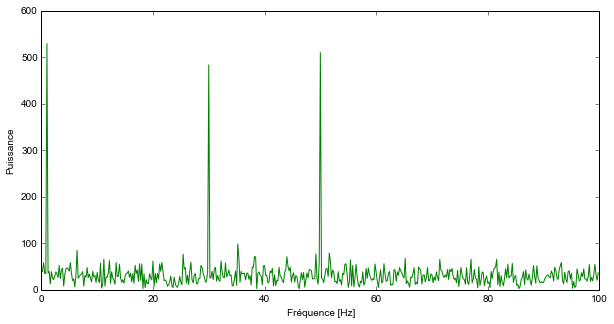

In [6]:
# On voit que le spectre obtenu est symétrique, 
# seule la partie positive suffira pour tracer le spectre
pidxs = sample_freq > 0
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]

# Tracé du spectre
fig3, ax3 = plt.subplots(figsize=(10,5)) 
ax3.plot(freqs, power, 'g')
ax3.set_xlabel('Fréquence [Hz]')
ax3.set_ylabel('Puissance')

**Conclusion : On retrouve bien nos trois fréquences**

### Etape 3 : Filtrage du signal

- Notre signal est bruité.. il est plein de 50Hz ! Mais on va l'enlever à l'aide d'un filtre.

1. Création du filtre : 

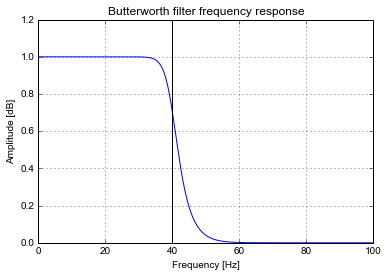

In [7]:
# Paramètres de notre filtre :
f_cutoff = 40.
N = 10                   # Ordre du filtre
Wn = f_cutoff/(fe*0.5)  # Nyquist frequency fraction

# Création du filtre :
b, a = scipy.signal.butter(N, Wn, 'low')

# Calcul de la reponse en fréquence du filtre
w, h = signal.freqz(b, a)

# Tracé de la réponse en fréquence du filtre
plt.plot(0.5*fe*w/np.pi, np.abs(h), 'b')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.axvline(f_cutoff, color='k')
plt.show()

2 : On applique ce filtre à notre signal

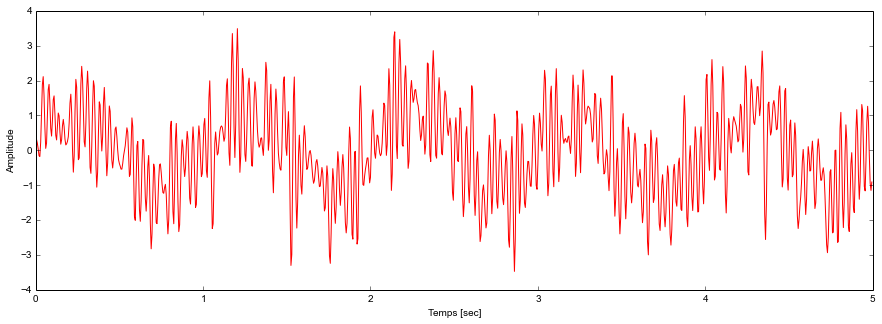

In [8]:
# Applique le filtre au signal :
filtered_sig = scipy.signal.filtfilt(b, a, sig)

# Tracé du signal filtré
plt.figure(figsize=(15,5))
#fig = plt.plot(times, sig)
fig = plt.plot(times, filtered_sig, 'r')
plt.xlabel('Temps [sec]')
plt.ylabel('Amplitude')

### Etape 4 : Tracé du spectre du signal filtré

### Exercice 8.2 : A vous de jouer ! 

### Solution 8.2 :